# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [81]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [82]:
df_hh_income.shape # (29322, 3)
df_hh_income.columns 

df_hh_income.isna().values.any() # True
df_hh_income.isna().sum() # 0, 0, 51 

df_hh_income.duplicated(subset=["Geographic Area", "City"]).values.any() # False

df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [84]:
df_pct_poverty.shape # (29322, 3)
df_pct_poverty.columns

df_pct_poverty.isna().values.any() # False
df_pct_poverty.duplicated(subset=["Geographic Area", "City"]).values.any() # False

df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [85]:
df_pct_completed_hs.shape # (29329, 3)
df_pct_completed_hs.columns 

df_pct_completed_hs.isna().values.any() # False
df_pct_completed_hs.duplicated(subset=["Geographic Area", "City"]).values.any() # False

df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [86]:
df_share_race_city.shape # (29268, 7)
df_share_race_city.columns 

df_share_race_city.isna().values.any() # False
df_share_race_city.duplicated(subset=["Geographic area", "City"]).values.any() # False

df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [87]:
df_fatalities.shape # (2535, 14)
df_fatalities.columns 

df_fatalities.isna().values.any() # True
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [88]:
df_fatalities.duplicated().values.any() # False 
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


We need to deal with NaN values in df_hh_income and df_fatalities. We also need to rename some columns names.

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [89]:
df_hh_income.dropna(inplace=True)

In [90]:
df_hh_income.rename(columns={"Geographic Area": "geographic_area", "Median Income": "median_income"}, inplace=True)
df_pct_poverty.rename(columns={"Geographic Area": "geographic_area", "City": "city"}, inplace=True)
df_pct_completed_hs.rename(columns={"Geographic Area": "geographic_area", "City": "city"}, inplace=True)
df_share_race_city.rename(columns={"Geographic area": "geographic_area", "City": "city"}, inplace=True)


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [92]:
# Data preparation
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geographic_area  29329 non-null  object
 1   city             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [109]:
state_poverty = df_pct_poverty.groupby("geographic_area").agg({"poverty_rate" : pd.Series.mean})
state_poverty.sort_values(by="poverty_rate", ascending=False, inplace=True)

bar_chart = px.bar(state_poverty, x=state_poverty.index, y="poverty_rate", title="Poverty Rate by State")
bar_chart.update_layout(xaxis_title="State", yaxis_title="Poverty Rate (%)")

Mississipi has the highest poverty rate, while New Jersey has the lowest poverty rate.

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [113]:
df_pct_completed_hs.info()
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   geographic_area       29329 non-null  object
 1   city                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [114]:
state_hs = df_pct_completed_hs.groupby("geographic_area").agg({"percent_completed_hs": pd.Series.mean})
state_hs.sort_values(by="percent_completed_hs", ascending=False, inplace=True)

bar_chart = px.bar(state_hs, x=state_hs.index, y="percent_completed_hs", title="High School Graduation Rate by State")
bar_chart.update_layout(xaxis_title="State", yaxis_title="High School Graduation Rate")

Texas has the lowest graduation rate, while Massachusetts has the highest.

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

Text(0, 0.5, 'High School Graduation Rate (%)')

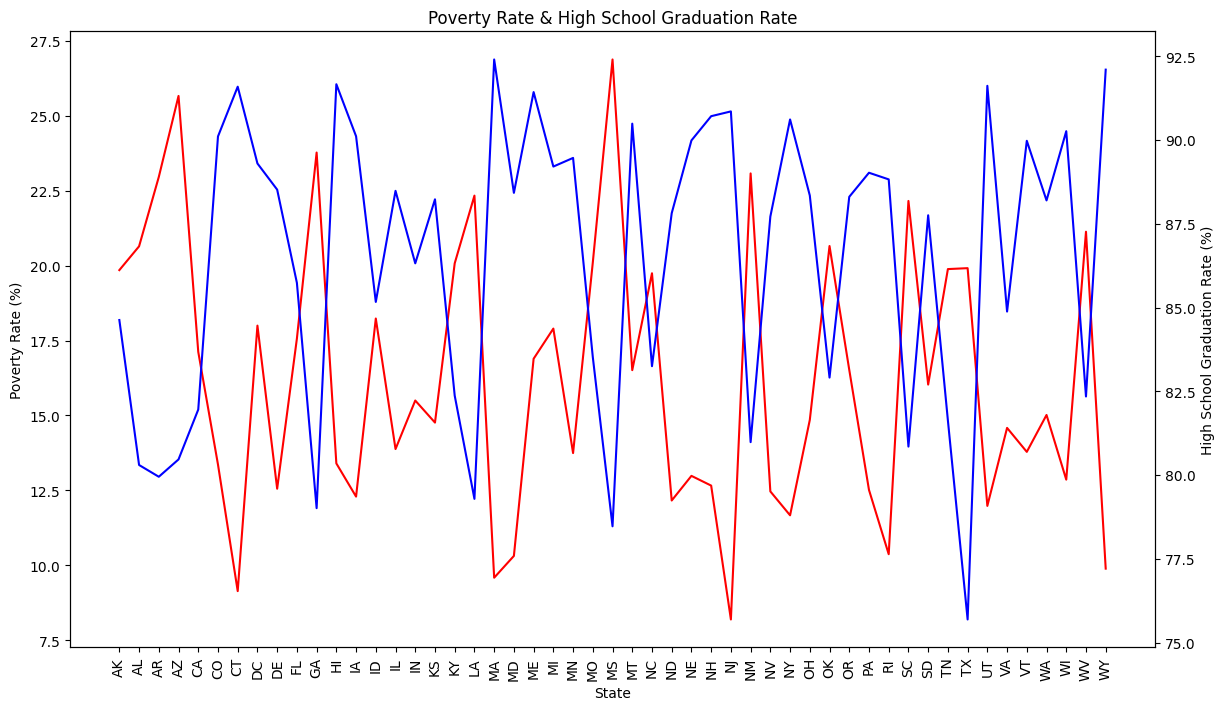

In [199]:
state_data = pd.merge(state_poverty, state_hs, on="geographic_area")

# Setup
plt.figure(figsize=(14, 8))
plt.title("Poverty Rate & High School Graduation Rate")
plt.xticks(rotation=90)
axis_1 = plt.gca()
axis_2 = axis_1.twinx()

axis_1.plot(state_data.index, state_data.poverty_rate, color="red", label="Poverty Rate")
axis_2.plot(state_data.index, state_data.percent_completed_hs, color="blue", label="High School Graduation Rate")

axis_1.set_xlabel("State")
axis_1.set_ylabel("Poverty Rate (%)")
axis_2.set_ylabel("High School Graduation Rate (%)")

Clearly, there's a relationship between the High School Graduation Rate and the Poverty Rate. To be more precise, when the High School Graduation Rate goes up, the Poverty Rate goes down.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [150]:
state_data.head()

,poverty_rate,percent_completed_hs
geographic_area,,
AK,19.85,84.63
AL,20.65,80.30
AR,22.96,79.95
AZ,25.67,80.47
CA,17.12,81.96


Text(0.5, 36.72222222222221, 'Poverty Rate (%)')

<Figure size 1400x800 with 0 Axes>

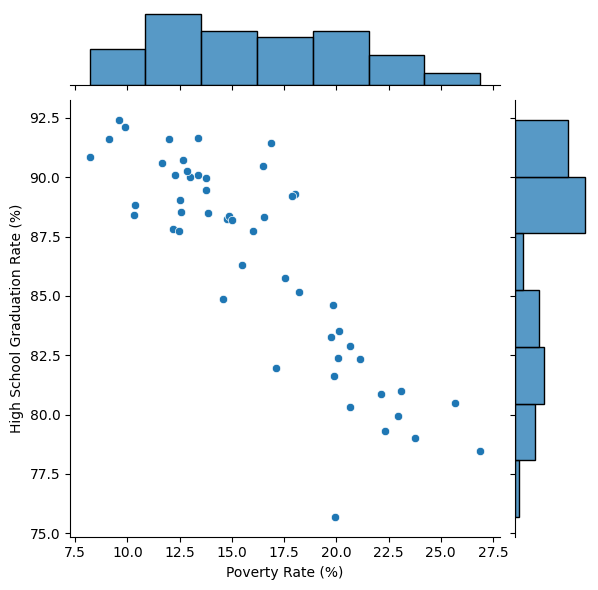

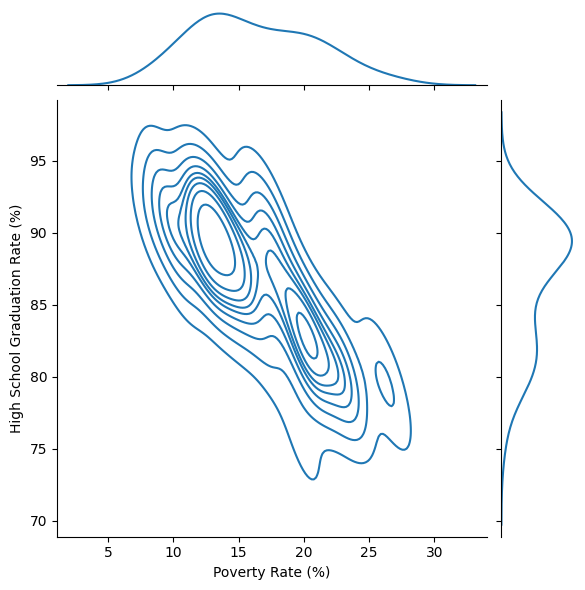

In [174]:
plt.figure(figsize=(14, 8))

# Scatter
sns.jointplot(data=state_data, x="poverty_rate", y="percent_completed_hs")
plt.ylabel("High School Graduation Rate (%)")
plt.xlabel("Poverty Rate (%)")

# KDE
sns.jointplot(data=state_data, x="poverty_rate", y="percent_completed_hs", kind="kde")
plt.ylabel("High School Graduation Rate (%)")
plt.xlabel("Poverty Rate (%)")


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

Text(0.5, 1.0, 'Poverty Rate & High School Graduation Rate')

<Figure size 1400x800 with 0 Axes>

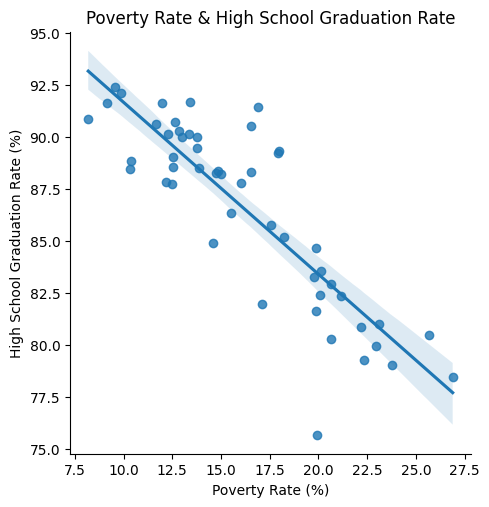

In [175]:
plt.figure(figsize=(14, 8))

# LM Plot
sns.lmplot(data=state_data, x="poverty_rate", y="percent_completed_hs")
plt.ylabel("High School Graduation Rate (%)")
plt.xlabel("Poverty Rate (%)")
plt.title("Poverty Rate & High School Graduation Rate")

Text(0.5, 1.0, 'Poverty Rate & High School Graduation Rate')

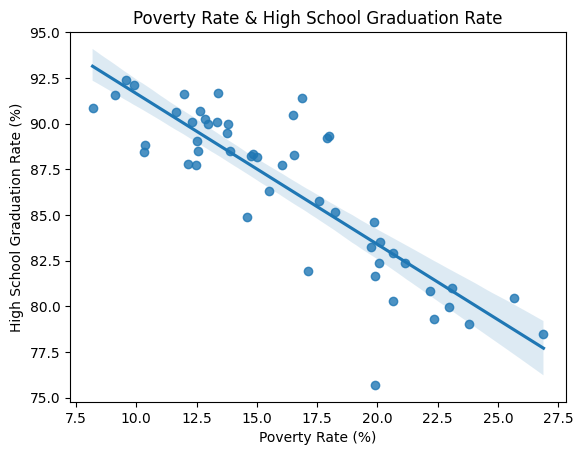

In [177]:
# Regression Plot
sns.regplot(data=state_data, x="poverty_rate", y="percent_completed_hs")
plt.ylabel("High School Graduation Rate (%)")
plt.xlabel("Poverty Rate (%)")
plt.title("Poverty Rate & High School Graduation Rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [189]:
# Data Cleaning
races = ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]
for race in races:
    df_share_race_city[race] = pd.to_numeric(df_share_race_city[race], errors="coerce")
    df_share_race_city[race].fillna(0)

In [198]:
# Group Data
state_shares = df_share_race_city.groupby("geographic_area").agg({"share_white": pd.Series.mean, 
                                                   "share_black": pd.Series.mean, 
                                                   "share_native_american": pd.Series.mean, 
                                                   "share_asian": pd.Series.mean, 
                                                   "share_hispanic": pd.Series.mean})

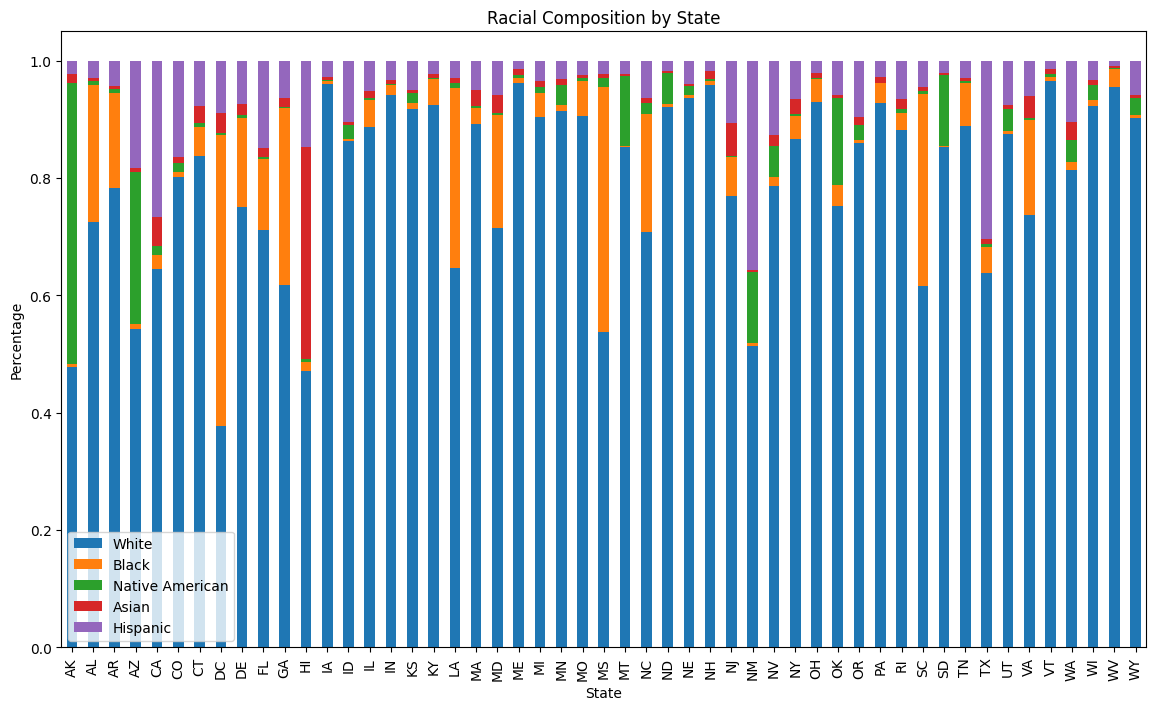

In [207]:

# Data Normalization
state_shares_normalized = state_shares.div(state_shares.sum(axis=1), axis=0)
state_shares_normalized.columns = ["White", "Black", "Native American", "Asian", "Hispanic"]

# Bar Chart
state_shares_normalized.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.ylabel('Percentage')
plt.xlabel("State")
plt.title('Racial Composition by State')
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [209]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [212]:
fatalities_by_race = df_fatalities.race.value_counts()
fatalities_by_race

race
W    1177
B     601
H     410
A      37
N      29
O      28
Name: count, dtype: int64

In [220]:
fatalities_by_race.index = ["White", "Black", "Hispanic", "Asian", "Native American", "Other"]

In [222]:
px.pie(data_frame=fatalities_by_race, 
       labels=fatalities_by_race.index, 
       values=fatalities_by_race.values,
       names=fatalities_by_race.index,
       title="Race of Police Fatalities",
       hole=0.5)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).